In [2]:
import pandas as pd

# read the Excel file
df = pd.read_excel('updates_dataset_employee.xlsx')


In [3]:
df

,S.No,Timestamp,Age,Gender,Country,family_history,treatment,work_interfere,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,8/27/2014 11:29,37,Female,United States,No,Yes,Often,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,8/27/2014 11:29,44,Male,United States,No,No,Rarely,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,8/27/2014 11:29,32,Male,Canada,No,No,Rarely,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,8/27/2014 11:29,31,Male,United Kingdom,Yes,Yes,Often,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,8/27/2014 11:30,31,Male,United States,No,No,Never,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1044,8/29/2014 11:20,26,Male,United States,No,Yes,Sometimes,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1025,1045,8/29/2014 11:22,29,Female,United Kingdom,No,Yes,Often,No,No,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes
1026,1046,8/29/2014 11:23,26,Female,Canada,Yes,Yes,Sometimes,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1027,1047,8/29/2014 11:24,33,Male,Italy,Yes,Yes,Sometimes,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


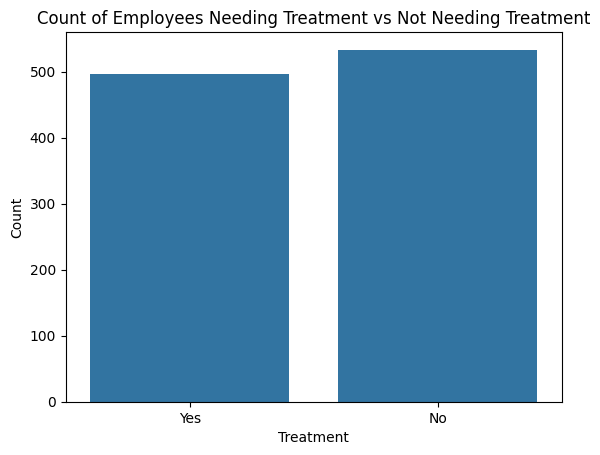

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='treatment', data=df)
plt.title('Count of Employees Needing Treatment vs Not Needing Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

Out of 1029 employees, 496 (≈48.2%) have indicated that they needed treatment, while 533 (≈51.8%) did not.
The nearly equal distribution suggests that mental health concerns are significant in the workplace.

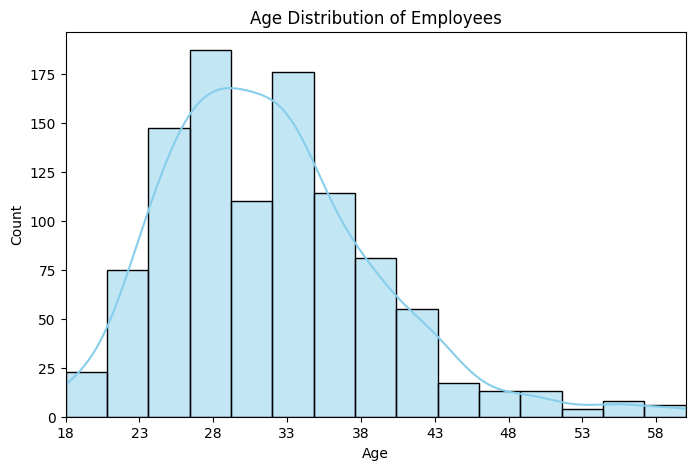

In [21]:
# Convert 'Age' column to numeric before plotting
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True, color="skyblue")

plt.xlim(18, 60)
plt.xticks(range(18, 61, 5))

plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution is approximately normal, meaning most employees fall within a balanced age range.

There are two peaks in the distribution:
Ages 23-28: Likely representing younger employees, possibly early-career professionals.
Ages 33-38: Representing mid-career professionals with more experience.

The distribution suggests that the company's workforce consists mostly of employees in their 20s and 30s, with fewer employees in older age groups.

This insight can help target wellness programs based on different career stages—younger employees might need stress management, while mid-career employees might face work-life balance challenges.

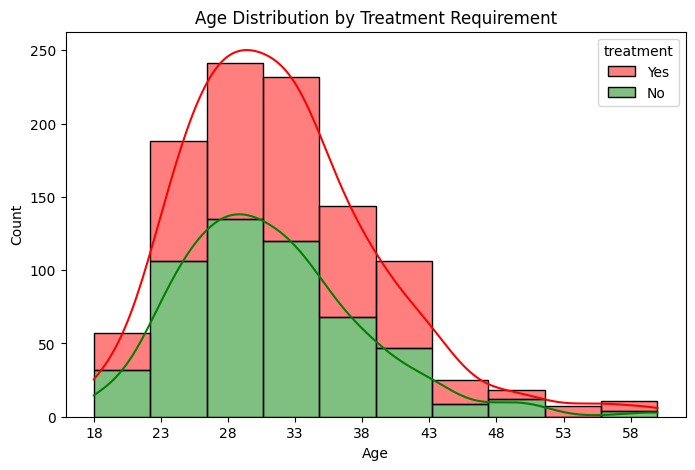

In [ ]:
plt.figure(figsize=(8, 5))


sns.histplot(df, x="Age", hue="treatment", bins=10, kde=True, multiple="stack", 
             palette={"Yes": "red", "No": "green"}, hue_order=["Yes", "No"])


plt.title("Age Distribution by Treatment Requirement")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(18, 61, 5))

handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles, ["Needs Treatment", "Does Not Need Treatment"], title="Treatment")

plt.show()

1️⃣ Age Groups Most in Need of Treatment:

The highest number of employees needing treatment falls between 23 to 28 years and 33 to 38 years, as seen from the red bars peaking in these ranges.

2️⃣ Younger Employees Are More Affected:

The number of employees needing treatment (red) is consistently higher than those not needing treatment (green) in the 23–38 age group, indicating younger employees might be more vulnerable.

3️⃣ Decline in Treatment Need With Age:

As age increases beyond 38 years, both groups decline, but the number of people not needing treatment (green bars) remains relatively stable, suggesting older employees might have better coping mechanisms or lower stress levels.

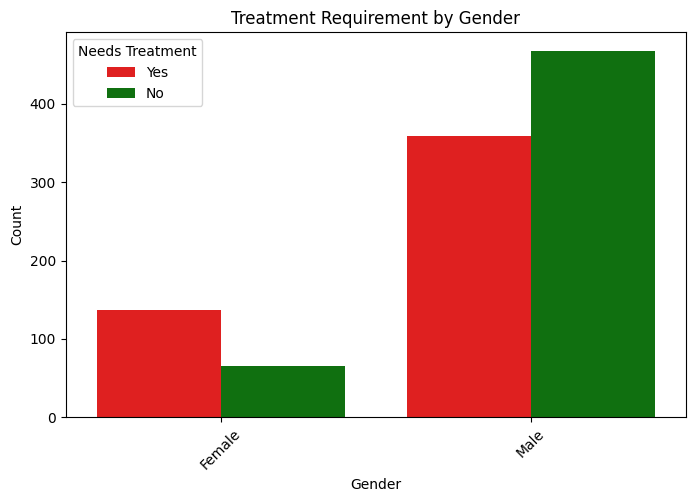

In [28]:
plt.figure(figsize=(8, 5))

# Countplot for gender and treatment
sns.countplot(data=df, x="Gender", hue="treatment", palette={"Yes": "red", "No": "green"})

plt.title("Treatment Requirement by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Needs Treatment")
plt.xticks(rotation=45)

plt.show()

1️⃣ Males have a higher total count compared to females in the dataset, as their bars are significantly taller.

2️⃣ More males do not need treatment (green bar) compared to those who do (red bar), suggesting a lower overall proportion of treatment need among males.

3️⃣ Among females, the proportion needing treatment (red) is much higher compared to those who do not (green).

This suggests that females in the dataset are more likely to require mental health treatment compared to males.

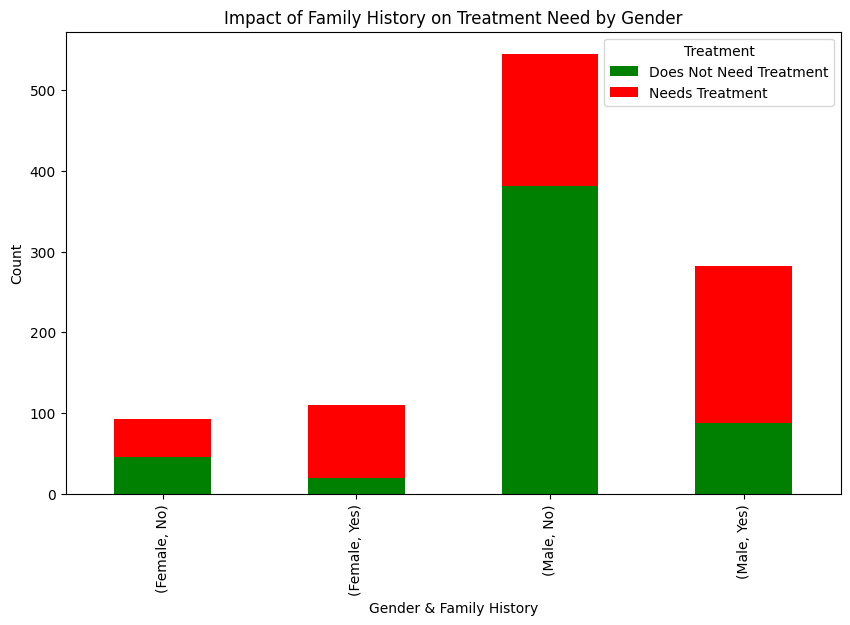

In [29]:
grouped = df.groupby(["Gender", "family_history", "treatment"]).size().unstack()

# Stacked bar chart
grouped.plot(kind="bar", stacked=True, figsize=(10, 6), color=["green", "red"])

plt.title("Impact of Family History on Treatment Need by Gender")
plt.xlabel("Gender & Family History")
plt.ylabel("Count")
plt.legend(["Does Not Need Treatment", "Needs Treatment"], title="Treatment")

plt.show()

1. Males Without Family History (Male, No)

Majority of this group does not need treatment (green bar is significantly higher).
However, a notable portion still requires treatment (red bar).

2. Males With Family History (Male, Yes)

A significant number of males with a family history of mental illness need treatment (red bar is larger compared to "Male, No").
This suggests that family history plays a role in mental health treatment needs for males.

3. Females Without Family History (Female, No)

The number of females without a family history needing treatment is relatively low compared to males.
Most in this group do not require treatment.

4. Females With Family History (Female, Yes)

The number of females needing treatment increases when there is a family history.
However, the increase is not as drastic as in males.

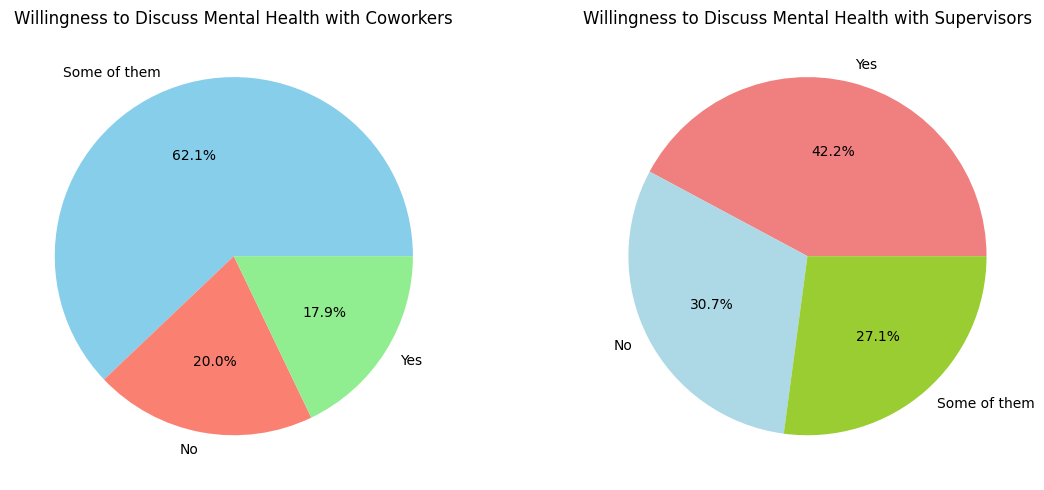

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['coworkers'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title("Willingness to Discuss Mental Health with Coworkers")
plt.ylabel('')  # Hides the default y-label

# Pie chart for Supervisor
plt.subplot(1, 2, 2)
df['supervisor'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'yellowgreen'])
plt.title("Willingness to Discuss Mental Health with Supervisors")
plt.ylabel('')  

plt.tight_layout()
plt.show()

1. Willingness to Discuss Mental Health with Coworkers:

+ A majority (62.1%) of employees are comfortable discussing mental health issues with some of their coworkers.
+ Only 17.9% are fully open to discussing it with coworkers.
+ 20% of employees are not willing to discuss mental health with their coworkers.

2. Willingness to Discuss Mental Health with Supervisors:

+ 42.2% of employees are open to discussing mental health with their supervisors.
+ 27.1% prefer discussing it with only some supervisors.
+ 30.7% of employees are not comfortable discussing mental health with their supervisors.

Employees are more hesitant to openly discuss mental health with supervisors compared to coworkers. 

The category "Some of them" is dominant in both cases, indicating that employees selectively choose who they confide in.

A significant portion of employees (30.7% with supervisors & 20% with coworkers) still avoid discussing mental health at work.